# **Convolutional Neural Network**
**Preprocessing images**

In [1]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 58.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models,preprocessing,regularizers,callbacks
from matplotlib import pyplot as plt

data_generator = preprocessing.image.ImageDataGenerator(rescale=1/255)  # normalisation
train_generator = data_generator.flow_from_directory('../input/model1-splitfolders/final_image_data/train',batch_size=10,target_size=(512,512),class_mode='binary')
val_generator = data_generator.flow_from_directory('../input/model1-splitfolders/final_image_data/val',color_mode='rgb',target_size=(512,512),class_mode='binary')
test_generator = data_generator.flow_from_directory('../input/model1-splitfolders/final_image_data/test',batch_size=10,target_size=(512,512),class_mode='binary')


Found 4200 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


**Model**

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((4, 4), strides=4))
model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((1, 3), strides=(1,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='linear',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy',tf.keras.metrics.TrueNegatives(),tf.keras.metrics.TruePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])

2022-11-20 18:45:05.187660: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 18:45:05.188742: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 18:45:05.449651: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 18:45:05.450651: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-20 18:45:05.451676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

**Fitting**

2022-11-20 18:45:10.979814: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-11-20 18:45:14.152222: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


420/420 [==============================] - 97s 198ms/step - loss: 3.3689 - accuracy: 0.4840 - true_negatives: 872.0000 - true_positives: 1161.0000 - false_negatives: 939.0000 - false_positives: 1228.0000 - val_loss: 3.1439 - val_accuracy: 0.5300 - val_true_negatives: 218.0000 - val_true_positives: 100.0000 - val_false_negatives: 200.0000 - val_false_positives: 82.0000
Epoch 2/25
420/420 [==============================] - 53s 127ms/step - loss: 2.9516 - accuracy: 0.5157 - true_negatives: 1273.0000 - true_positives: 893.0000 - false_negatives: 1207.0000 - false_positives: 827.0000 - val_loss: 2.7674 - val_accuracy: 0.5583 - val_true_negatives: 63.0000 - val_true_positives: 272.0000 - val_false_negatives: 28.0000 - val_false_positives: 237.0000
Epoch 3/25
420/420 [==============================] - 53s 126ms/step - loss: 2.6039 - accuracy: 0.5195 - true_negatives: 1023.0000 - true_positives: 1159.0000 - false_negatives: 941.0000 - false_positives: 1077.0000 - val_loss: 2.4493 - val_accurac

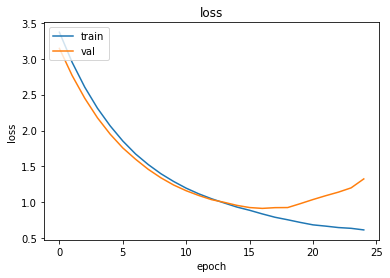

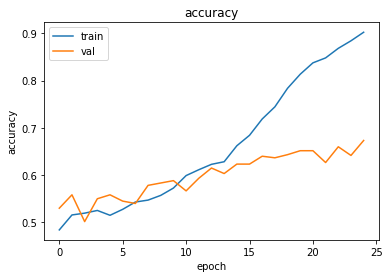

In [4]:
history=model.fit(train_generator,epochs=25,validation_data=val_generator,shuffle=True, callbacks=[callbacks.EarlyStopping(monitor='val_acc', patience=5,restore_best_weights=True)])
# using early stopping method to train the model to achieve maximum accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Testing**

In [5]:
loss,accuracy,tn,tp,fn,fp=model.evaluate(test_generator)
print("Accuracy: ",accuracy)
print("True negative: ",tn)
print("True positive: ",tp)
print("False negative: ",fn)
print("False postive: ",fp)

120/120 [==============================] - 21s 175ms/step - loss: 1.2685 - accuracy: 0.6808 - true_negatives: 453.0000 - true_positives: 364.0000 - false_negatives: 236.0000 - false_positives: 147.0000
Accuracy:  0.6808333396911621
True negative:  453.0
True positive:  364.0
False negative:  236.0
False postive:  147.0
